In [0]:
# libs import
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.models import Sequential
from keras import models, layers
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from tensorflow.python.util import deprecation

import matplotlib.pyplot as plt
import numpy as np
import keras

In [0]:
# fetching dataset
dataset = fetch_openml('mnist_784')

# suppress warning
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [0]:
# reshaping
data = dataset.data.reshape((dataset.data.shape[0], 28, 28))

# reshaping + add new axis
data = data[:, :, :, np.newaxis]

In [0]:
# skalakan dari range 0-255 menjadi range 0-1
scaled_data = data / 255.0

In [0]:
# split training & test
(x_train, x_test, y_train, y_test) = train_test_split(
    scaled_data,
    dataset.target.astype("float32"), 
    test_size = 0.20)

In [0]:
# transformasi target training dengan one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)

# transformasi target testing dengan one-hot encoding
y_test = np_utils.to_categorical(y_test, 10)

# One hot encoding is a process by which categorical variables are 
# converted into a form that could be provided to ML algorithms to 
# do a better job in prediction.

In [0]:
# instantiasikan model sequential kosong
model = Sequential()

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation="tanh", input_shape=(28,28,1), padding="same"))

# S2 Pooling/Subsampling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation="tanh", padding="valid"))

# S4 Pooling/Subsampling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation="tanh", padding="valid"))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation="tanh"))

#Output Layer (softmax activation)
model.add(layers.Dense(10, activation="softmax"))

In [0]:
# model compiling
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="SGD", metrics=["accuracy"])

In [0]:
# epoch 50
hist = model.fit(x=x_train,y=y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Train on 56000 samples, validate on 14000 samples
Epoch 1/50
56000/56000 [==============================] - 3s 55us/step - loss: 0.6889 - acc: 0.8356 - val_loss: 0.3607 - val_acc: 0.8958
Epoch 2/50
56000/56000 [==============================] - 3s 52us/step - loss: 0.3135 - acc: 0.9120 - val_loss: 0.2845 - val_acc: 0.9203
Epoch 3/50
56000/56000 [==============================] - 3s 50us/step - loss: 0.2580 - acc: 0.9272 - val_loss: 0.2450 - val_acc: 0.9289
Epoch 4/50
56000/56000 [==============================] - 3s 51us/step - loss: 0.2239 - acc: 0.9356 - val_loss: 0.2168 - val_acc: 0.9379
Epoch 5/50
56000/56000 [==============================] - 3s 49us/step - loss: 0.1997 - acc: 0.9431 - val_loss: 0.1978 - val_acc: 0.9432
Epoch 6/50
56000/56000 [==============================] - 3s 53us/step - loss: 0.1810 - acc: 0.9484 - val_loss: 0.1826 - val_acc: 0.9472
Epoch 7/50
56000/56000 [==============================] - 3s 51us/step - loss: 0.1654 - acc: 0.9532 - val_loss: 0.1710 - val_acc

In [0]:
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

14000/14000 [==============================] - 1s 52us/step
Test loss 0.0504, accuracy 98.42%


Text(0, 0.5, 'acc')

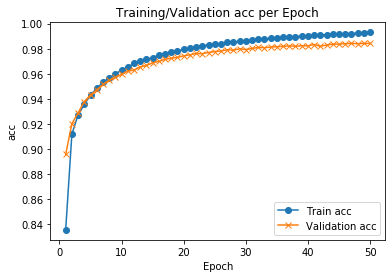

In [0]:
#plotting
f, ax = plt.subplots()
ax.plot([None] + hist.history["acc"], "o-")
ax.plot([None] + hist.history["val_acc"], "x-")

ax.legend(["Train acc", "Validation acc"], loc = 0)
ax.set_title("Training/Validation acc per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("acc") 

Text(0, 0.5, 'acc')

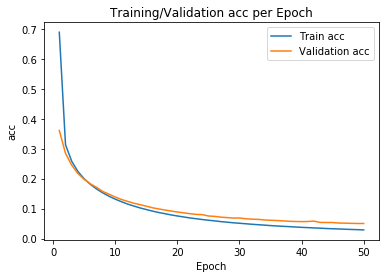

In [0]:
#plotting
f, ax = plt.subplots()
ax.plot([None] + hist.history["loss"])
ax.plot([None] + hist.history["val_loss"])

ax.legend(["Train acc", "Validation acc"], loc = 0)
ax.set_title("Training/Validation acc per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("acc")